In [1]:
import os
import numpy as np
import pandas as pd
import datetime

from fedot.api.main import Fedot
from fedot.core.data.data import InputData
from fedot.core.data.multi_modal import MultiModalData
from fedot.core.data.supplementary_data import SupplementaryData
from fedot.core.pipelines.node import PrimaryNode, SecondaryNode
from fedot.core.pipelines.pipeline import Pipeline
from fedot.core.repository.dataset_types import DataTypesEnum
from fedot.core.repository.tasks import TaskTypesEnum, Task
from sklearn.metrics import classification_report, mean_absolute_error
from sklearn.model_selection import train_test_split
import scikitplot as skplt

/home/alcatraz/anaconda3/envs/milk_project/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2022-10-13 15:16:35.339465: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/alcatraz/orca:
2022-10-13 15:16:35.339494: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
# load data with 5 antibiotics and milk created on ivium device
data_5_antibiotics = pd.read_csv('../../galacticum_12_plus_3_cycles_2022-07-21_all_cycles.csv')
data_5_antibiotics.drop([data_5_antibiotics.columns[0]], axis=1, inplace=True)
data_5_antibiotics

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_15592,feature_15593,feature_15594,feature_15595,feature_15596,feature_15597,feature_15598,feature_15599,target,substance
0,-239.2249,-147.7744,-109.2379,-88.59439,-75.91480,-67.95934,-62.13931,-58.28719,-54.36399,-52.30330,...,-88.67120,-88.50806,-88.02397,-87.34167,-87.01472,-86.31874,-86.25062,-85.41089,0.200,streptomycine
1,-265.2187,-176.9633,-135.7809,-113.42580,-99.36153,-90.20798,-83.02010,-77.71083,-73.54716,-70.04523,...,-83.65077,-83.21550,-82.83266,-82.35813,-82.19022,-81.80927,-81.34760,-81.05753,0.200,streptomycine
2,-244.1133,-154.8523,-115.2871,-93.91983,-81.31644,-72.63999,-66.88848,-61.95932,-58.66615,-55.73158,...,-104.43100,-103.77850,-103.32490,-102.54750,-101.66600,-101.21700,-100.24980,-99.94849,0.200,streptomycine
3,-257.1178,-170.2977,-128.9954,-106.71480,-92.50252,-82.94862,-75.98217,-70.95926,-66.88725,-63.60492,...,-75.32269,-74.55951,-74.59321,-74.44571,-73.95777,-73.68431,-73.36658,-73.21136,0.200,streptomycine
4,-355.1576,-264.8748,-206.0219,-166.66030,-139.33550,-120.51790,-106.11260,-95.36269,-87.27319,-80.57039,...,-138.50600,-137.46680,-136.07100,-135.79660,-134.13550,-133.31850,-132.81370,-131.63670,0.200,streptomycine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,-266.9905,-176.9128,-134.3940,-111.45480,-96.52292,-86.60492,-79.22748,-73.52383,-69.02789,-65.51290,...,-158.48190,-157.00400,-155.13320,-153.47340,-151.63190,-150.09410,-148.92490,-147.22120,0.001,tetracycline
153,-276.5460,-184.1218,-134.8748,-107.37340,-89.76161,-77.43160,-69.00397,-61.97385,-56.91328,-52.65238,...,-98.68876,-98.05927,-97.56770,-97.05357,-96.62720,-96.43836,-95.95961,-95.45758,0.001,tetracycline
154,-329.4147,-239.4904,-189.7573,-159.90170,-140.63840,-126.84570,-116.47820,-108.80840,-102.28460,-96.93829,...,-236.79050,-236.20760,-235.74860,-235.51610,-234.35060,-233.89720,-233.13960,-232.47000,0.001,tetracycline
155,-310.5040,-216.8791,-169.7762,-142.94320,-125.58060,-113.79390,-104.89140,-97.98445,-92.85181,-88.18793,...,-164.64700,-162.55550,-160.87710,-159.05850,-157.49890,-155.58370,-154.47690,-153.08130,0.001,tetracycline


In [4]:
test_data_5_antibiotics = pd.read_csv('../../test_data_df_galacticum_12.csv')
test_data_5_antibiotics.drop([test_data_5_antibiotics.columns[0]], axis=1, inplace=True)
test_data_5_antibiotics

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_15592,feature_15593,feature_15594,feature_15595,feature_15596,feature_15597,feature_15598,feature_15599,target,substance
0,-220.4710,-145.0895,-110.0550,-90.95647,-78.79163,-70.40447,-64.83944,-60.07366,-56.79371,-53.84112,...,-124.0110,-122.8747,-121.1851,-120.0681,-118.2195,-117.2963,-116.0082,-114.7552,0.0,streptomycine
1,-241.0052,-162.3181,-124.1941,-103.45250,-89.78066,-81.02272,-74.25644,-69.16653,-65.26028,-62.09993,...,-256.5545,-256.1803,-255.7095,-255.3531,-254.5555,-253.6593,-253.3697,-252.4267,0.0,streptomycine
2,-769.0115,-682.1849,-629.4619,-592.12270,-564.07680,-542.61740,-525.04800,-510.96260,-499.05710,-488.86010,...,-478.2509,-478.8875,-479.3804,-479.9754,-479.9331,-480.9358,-481.3525,-481.4512,0.0,streptomycine
3,-382.0688,-284.5211,-233.6798,-202.84660,-182.32590,-167.33510,-156.45910,-147.82090,-140.76480,-134.94340,...,-385.1066,-381.6575,-377.9981,-373.9832,-370.1180,-365.8466,-361.4741,-357.3152,0.0,streptomycine
4,-388.5424,-297.8132,-249.1233,-218.21110,-197.36170,-182.45780,-170.66730,-161.70320,-154.37510,-148.37560,...,-497.4196,-497.2490,-497.0809,-496.3810,-496.1337,-495.7749,-495.3437,-495.1330,0.0,streptomycine
5,-112.5416,-105.8984,-102.0053,-99.23904,-96.90811,-95.11477,-92.63281,-91.72710,-90.27936,-88.87663,...,-107.9284,-108.4277,-108.2092,-108.4687,-109.0814,-108.9785,-108.9899,-109.4284,0.0,streptomycine
6,-359.0082,-263.3523,-216.6313,-189.60650,-171.30890,-158.37180,-148.74060,-141.14800,-135.03160,-129.57680,...,-317.6137,-313.9458,-309.9671,-306.5400,-303.2288,-299.9102,-296.3248,-293.3898,0.0,streptomycine
7,-227.1765,-158.2835,-127.1497,-109.60470,-98.52066,-90.28012,-83.96456,-79.20494,-75.23887,-71.53514,...,-215.4150,-214.0345,-212.7595,-211.4917,-209.7525,-208.1171,-206.8319,-205.1010,0.0,streptomycine
8,-344.1573,-258.5270,-215.8155,-189.70970,-172.26960,-159.58020,-149.72090,-141.99240,-135.73530,-130.19600,...,-242.7998,-240.9195,-238.9192,-237.2298,-234.9406,-233.6265,-231.8609,-229.7319,0.0,streptomycine
9,-389.5895,-292.0071,-239.5881,-207.83530,-186.59390,-171.38370,-160.79230,-151.92730,-145.18010,-139.31610,...,-455.4115,-454.2309,-453.5338,-452.7263,-451.4417,-450.2789,-448.9611,-448.3083,0.0,streptomycine


In [5]:
print(set(data_5_antibiotics['substance']))

{'milk', 'tetracycline', 'streptomycine'}


In [6]:
print(sorted(set(data_5_antibiotics.loc[data_5_antibiotics['substance'] == 'streptomycine']['target'])))
print(sorted(set(data_5_antibiotics.loc[data_5_antibiotics['substance'] == 'tetracycline']['target'])))

[0.02, 0.04, 0.2, 2.0, 20.0]
[0.001, 0.002, 0.01, 0.1, 1.0]


In [7]:
test_data_5_antibiotics.loc[(test_data_5_antibiotics['substance'] == 'streptomycine'), 'target'] = 0.2
test_data_5_antibiotics.loc[(test_data_5_antibiotics['substance'] == 'tetracycline'), 'target'] = 0.01
y_test_true = test_data_5_antibiotics[test_data_5_antibiotics.columns[-2]].values
test_data_5_antibiotics

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_15592,feature_15593,feature_15594,feature_15595,feature_15596,feature_15597,feature_15598,feature_15599,target,substance
0,-220.4710,-145.0895,-110.0550,-90.95647,-78.79163,-70.40447,-64.83944,-60.07366,-56.79371,-53.84112,...,-124.0110,-122.8747,-121.1851,-120.0681,-118.2195,-117.2963,-116.0082,-114.7552,0.20,streptomycine
1,-241.0052,-162.3181,-124.1941,-103.45250,-89.78066,-81.02272,-74.25644,-69.16653,-65.26028,-62.09993,...,-256.5545,-256.1803,-255.7095,-255.3531,-254.5555,-253.6593,-253.3697,-252.4267,0.20,streptomycine
2,-769.0115,-682.1849,-629.4619,-592.12270,-564.07680,-542.61740,-525.04800,-510.96260,-499.05710,-488.86010,...,-478.2509,-478.8875,-479.3804,-479.9754,-479.9331,-480.9358,-481.3525,-481.4512,0.20,streptomycine
3,-382.0688,-284.5211,-233.6798,-202.84660,-182.32590,-167.33510,-156.45910,-147.82090,-140.76480,-134.94340,...,-385.1066,-381.6575,-377.9981,-373.9832,-370.1180,-365.8466,-361.4741,-357.3152,0.20,streptomycine
4,-388.5424,-297.8132,-249.1233,-218.21110,-197.36170,-182.45780,-170.66730,-161.70320,-154.37510,-148.37560,...,-497.4196,-497.2490,-497.0809,-496.3810,-496.1337,-495.7749,-495.3437,-495.1330,0.20,streptomycine
5,-112.5416,-105.8984,-102.0053,-99.23904,-96.90811,-95.11477,-92.63281,-91.72710,-90.27936,-88.87663,...,-107.9284,-108.4277,-108.2092,-108.4687,-109.0814,-108.9785,-108.9899,-109.4284,0.20,streptomycine
6,-359.0082,-263.3523,-216.6313,-189.60650,-171.30890,-158.37180,-148.74060,-141.14800,-135.03160,-129.57680,...,-317.6137,-313.9458,-309.9671,-306.5400,-303.2288,-299.9102,-296.3248,-293.3898,0.20,streptomycine
7,-227.1765,-158.2835,-127.1497,-109.60470,-98.52066,-90.28012,-83.96456,-79.20494,-75.23887,-71.53514,...,-215.4150,-214.0345,-212.7595,-211.4917,-209.7525,-208.1171,-206.8319,-205.1010,0.20,streptomycine
8,-344.1573,-258.5270,-215.8155,-189.70970,-172.26960,-159.58020,-149.72090,-141.99240,-135.73530,-130.19600,...,-242.7998,-240.9195,-238.9192,-237.2298,-234.9406,-233.6265,-231.8609,-229.7319,0.20,streptomycine
9,-389.5895,-292.0071,-239.5881,-207.83530,-186.59390,-171.38370,-160.79230,-151.92730,-145.18010,-139.31610,...,-455.4115,-454.2309,-453.5338,-452.7263,-451.4417,-450.2789,-448.9611,-448.3083,0.20,streptomycine


In [8]:
test_data_5_antibiotics.to_csv('../../test_data_df_galacticum_12.csv')

In [9]:
# create func for input data

def prepare_data(dataframe: pd.DataFrame) -> InputData:
    features_names = list(dataframe.columns[:1])
    features_names.append(dataframe.columns[-1])

    reg_task = Task(TaskTypesEnum.regression)
    reg_input = InputData(idx=np.arange(0, len(dataframe)),
                            features=np.array(dataframe[features_names]),
                            target=np.array(dataframe[dataframe.columns[-2]]),
                            task=reg_task, data_type=DataTypesEnum.table)

    return reg_input

def prepare_test_data(dataframe: pd.DataFrame) -> InputData:
    features_names = list(dataframe.columns[:1])
    features_names.append(dataframe.columns[-1])

    reg_task = Task(TaskTypesEnum.regression)
    reg_input = InputData(idx=np.arange(0, len(dataframe)),
                          features=np.array(dataframe[features_names]),
                          target=None, task=reg_task, data_type=DataTypesEnum.table)

    return reg_input

In [10]:
prepared_train_data = prepare_data(data_5_antibiotics)
prepare_test_data = prepare_test_data(test_data_5_antibiotics)

In [11]:
model = Fedot(problem='regression', seed=42, timeout=3600, preset='auto')

In [12]:
pipeline = model.fit(prepared_train_data)

Generations:   1%|          | 1/100 [00:00<?, ?gen/s]

Number of used CPU's: 1
Number of used CPU's: 1
Number of used CPU's: 1


Generations:   2%|▏         | 2/100 [00:37<1:01:24, 37.60s/gen]

Number of used CPU's: 1


Generations:   3%|▎         | 3/100 [00:49<36:35, 22.63s/gen]  

Number of used CPU's: 1


Generations:   4%|▍         | 4/100 [01:09<34:23, 21.49s/gen]

Number of used CPU's: 1


Generations:   5%|▌         | 5/100 [01:29<32:42, 20.66s/gen]

Number of used CPU's: 1


Generations:   6%|▌         | 6/100 [02:03<40:07, 25.61s/gen]

Number of used CPU's: 1


Generations:   7%|▋         | 7/100 [02:32<41:35, 26.84s/gen]

Number of used CPU's: 1


Generations:   8%|▊         | 8/100 [03:05<44:04, 28.74s/gen]

Number of used CPU's: 1


Generations:   9%|▉         | 9/100 [03:33<43:23, 28.61s/gen]

Number of used CPU's: 1


Generations:  10%|█         | 10/100 [04:07<45:18, 30.21s/gen]

Number of used CPU's: 1


Generations:  11%|█         | 11/100 [04:39<45:26, 30.63s/gen]

Number of used CPU's: 1


Generations:  12%|█▏        | 12/100 [05:11<45:47, 31.22s/gen]

Number of used CPU's: 1


Generations:  13%|█▎        | 13/100 [05:45<46:13, 31.87s/gen]

Number of used CPU's: 1


Generations:  14%|█▍        | 14/100 [06:22<47:56, 33.44s/gen]

Number of used CPU's: 1


Generations:  15%|█▌        | 15/100 [06:48<44:12, 31.21s/gen]

Number of used CPU's: 1


Generations:  16%|█▌        | 16/100 [07:14<41:45, 29.83s/gen]

Number of used CPU's: 1


Generations:  17%|█▋        | 17/100 [07:40<39:29, 28.55s/gen]

Number of used CPU's: 1


Generations:  18%|█▊        | 18/100 [08:12<40:38, 29.74s/gen]

Number of used CPU's: 1


Generations:  19%|█▉        | 19/100 [08:41<39:50, 29.51s/gen]

Number of used CPU's: 1


Generations:  20%|██        | 20/100 [09:18<42:06, 31.59s/gen]

Number of used CPU's: 1


Generations:  21%|██        | 21/100 [09:53<42:53, 32.58s/gen]

Number of used CPU's: 1


Generations:  22%|██▏       | 22/100 [10:33<45:27, 34.97s/gen]

Number of used CPU's: 1


Generations:  23%|██▎       | 23/100 [11:06<43:51, 34.17s/gen]

Number of used CPU's: 1


Generations:  24%|██▍       | 24/100 [11:37<42:05, 33.23s/gen]

Number of used CPU's: 1


Generations:  25%|██▌       | 25/100 [12:12<42:23, 33.91s/gen]

Number of used CPU's: 1


Generations:  26%|██▌       | 26/100 [12:48<42:32, 34.50s/gen]

Number of used CPU's: 1


Generations:  27%|██▋       | 27/100 [13:19<40:40, 33.43s/gen]

Number of used CPU's: 1


Generations:  28%|██▊       | 28/100 [13:55<41:10, 34.32s/gen]

Number of used CPU's: 1


--- Logging error ---
Traceback (most recent call last):
  File "/home/alcatraz/anaconda3/envs/milk_project/lib/python3.7/site-packages/fedot/core/operations/evaluation/operation_implementations/data_operations/sklearn_filters.py", line 86, in fit
    self.operation.fit(input_data.features, input_data.target)
  File "/home/alcatraz/anaconda3/envs/milk_project/lib/python3.7/site-packages/sklearn/linear_model/_ransac.py", line 528, in fit
    "RANSAC could not find a valid consensus set. All"
ValueError: RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/alcatraz/anaconda3/envs/milk_project/lib/python3.7/logging/__init__.py", line 1028, in emit
    stream.write(msg + self.terminator)
ValueError: I/O operation on clos

Number of used CPU's: 1


Generations:  30%|███       | 30/100 [15:12<42:34, 36.50s/gen]

Number of used CPU's: 1


Generations:  31%|███       | 31/100 [15:49<42:11, 36.69s/gen]

Number of used CPU's: 1


Generations:  32%|███▏      | 32/100 [16:26<41:31, 36.64s/gen]

Number of used CPU's: 1


Generations:  33%|███▎      | 33/100 [17:09<43:12, 38.69s/gen]

Number of used CPU's: 1


Generations:  34%|███▍      | 34/100 [17:51<43:38, 39.68s/gen]

Number of used CPU's: 1


Generations:  35%|███▌      | 35/100 [18:39<45:28, 41.98s/gen]

Number of used CPU's: 1


Generations:  36%|███▌      | 36/100 [19:21<44:42, 41.91s/gen]

Number of used CPU's: 1


Generations:  37%|███▋      | 37/100 [20:09<45:58, 43.79s/gen]

Number of used CPU's: 1


Generations:  38%|███▊      | 38/100 [20:56<46:15, 44.76s/gen]

Number of used CPU's: 1


Generations:  39%|███▉      | 39/100 [21:49<48:00, 47.22s/gen]

Number of used CPU's: 1


--- Logging error ---
Traceback (most recent call last):
  File "/home/alcatraz/anaconda3/envs/milk_project/lib/python3.7/site-packages/fedot/core/operations/evaluation/operation_implementations/data_operations/sklearn_filters.py", line 86, in fit
    self.operation.fit(input_data.features, input_data.target)
  File "/home/alcatraz/anaconda3/envs/milk_project/lib/python3.7/site-packages/sklearn/linear_model/_ransac.py", line 528, in fit
    "RANSAC could not find a valid consensus set. All"
ValueError: RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/alcatraz/anaconda3/envs/milk_project/lib/python3.7/logging/__init__.py", line 1028, in emit
    stream.write(msg + self.terminator)
ValueError: I/O operation on clos

Number of used CPU's: 1


Generations:  41%|████      | 41/100 [23:27<47:07, 47.93s/gen]

Number of used CPU's: 1


Generations:  42%|████▏     | 42/100 [24:12<45:36, 47.18s/gen]

Number of used CPU's: 1


Generations:  43%|████▎     | 43/100 [25:19<50:21, 53.00s/gen]

Number of used CPU's: 1


Generations:  44%|████▍     | 44/100 [26:53<1:00:48, 65.14s/gen]

Number of used CPU's: 1


Generations:  45%|████▌     | 45/100 [28:05<1:01:51, 67.49s/gen]

Number of used CPU's: 1


Generations:  46%|████▌     | 46/100 [29:28<1:04:39, 71.84s/gen]

Number of used CPU's: 1


Generations:  47%|████▋     | 47/100 [30:45<1:04:51, 73.42s/gen]

Number of used CPU's: 1


Generations:  48%|████▊     | 48/100 [31:49<1:01:19, 70.76s/gen]

Number of used CPU's: 1


Generations:  49%|████▉     | 49/100 [32:47<56:46, 66.80s/gen]  

Number of used CPU's: 1


Generations:  50%|█████     | 50/100 [33:50<34:32, 41.44s/gen]

Hyperparameters optimization start


100%|██████████| 1000/1000 [09:58<00:00,  1.67trial/s, best loss: 4.593473432327155]
Hyperparameters optimization finished
Return tuned pipeline due to the fact that obtained metric 4.704 equal or smaller than initial (+ 5% deviation) 4.956


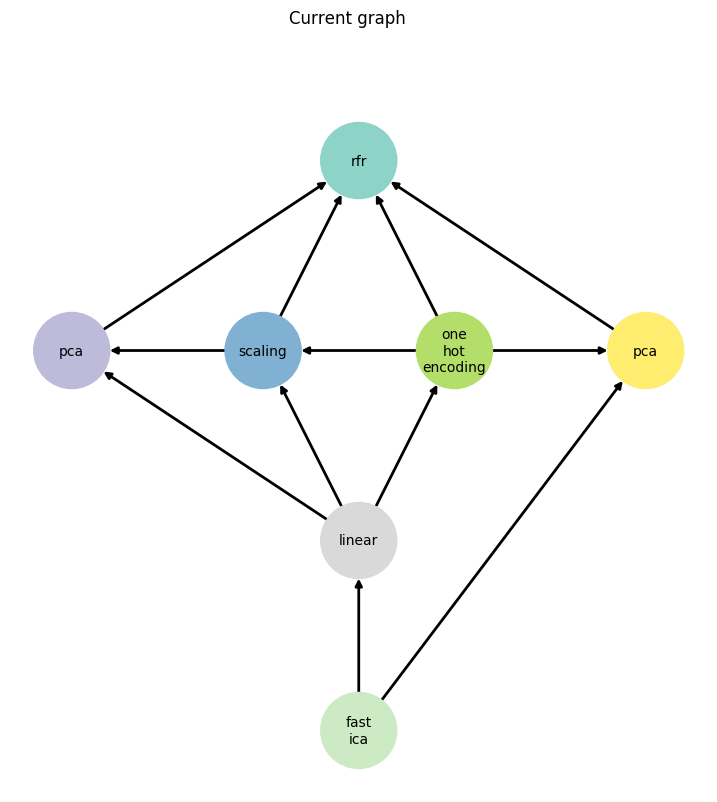

In [13]:
pipeline.show()

In [14]:
pred = pipeline.predict(prepare_test_data, output_mode='full_probs')
pred

OutputData(idx=array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26]), features=array([[ 1.84545927e+00,  6.74289780e-01,  6.74289780e-01,
         1.58133825e+00,  3.48899573e+00],
       [ 2.64385139e+00,  9.66004506e-01,  9.66004506e-01,
         2.26529600e+00,  4.17254164e+00],
       [ 2.03813121e+01,  7.44687822e+00,  7.44687822e+00,
         1.74621099e+01,  1.93585241e+01],
       [ 7.81748364e+00,  2.85633469e+00,  2.85633469e+00,
         6.69727350e+00,  8.60196308e+00],
       [ 8.03604706e+00,  2.93619290e+00,  2.93619290e+00,
         6.88451125e+00,  8.78908683e+00],
       [-2.20873546e+00, -8.07022820e-01, -8.07022820e-01,
        -1.89169091e+00,  1.79842278e-02],
       [ 7.04143041e+00,  2.57278209e+00,  2.57278209e+00,
         6.03247065e+00,  7.93754268e+00],
       [ 2.07293846e+00,  7.57405617e-01,  7.57405617e-01,
         1.77621227e+00,  3.68375275e+00],
       [ 6.43485437e+00,  2.35115270

In [15]:
pred = pred.predict
pred

array([0.79169459, 4.35811642, 7.53991342, 7.53991342, 7.53991342,
       0.07085314, 7.53991342, 1.28735675, 7.53991342, 7.53991342,
       7.53991342, 7.53991342, 7.53991342, 7.53991342, 7.53991342,
       7.53991342, 4.35811642, 0.148434  , 0.11904877, 0.148434  ,
       0.148434  , 0.10097388, 0.05418762, 0.148434  , 0.0543888 ,
       0.11677156, 0.06076499])

In [16]:
from sklearn.metrics import *

MAE = mean_absolute_error(y_test_true, pred)
MSE = mean_squared_error(y_test_true, pred)
R2 = r2_score(y_test_true, pred)

print(f'MAE = {MAE}')
print(f'MSE = {MSE}')
print(f'R2 = {R2}')

MAE = 3.676046803240985
MSE = 25.286980334186318
R2 = -2847.741873531421


In [ ]:
pipeline.save('milk_regression_fedot_galacticum')